### Multilayer perceptron

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# SMOTE balancing technique is applied
from imblearn.over_sampling import SMOTE
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [16]:
from tensorflow.keras.layers import PReLU

In [14]:
from tensorflow.keras.layers import Dense,Input,Activation,Dropout
from tensorflow.keras import Model
from tensorflow.keras import Sequential
import random as rn
from sklearn.metrics import roc_auc_score, precision_score, recall_score
import datetime

In [34]:
# Read the dataset
data = pd.read_csv("./data_syn_all_features.csv")

In [35]:
# get the predictors and target variable from dataset
X = data.drop('readmitted', axis=1)
y = data['readmitted']
oversample = SMOTE()

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [78]:
num_classes = 2

In [79]:
model_mlp = Sequential()
model_mlp.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
# output layer
model_mlp.add(Dense(num_classes, activation='sigmoid'))
model_mlp.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               14200     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 14,402
Trainable params: 14,402
Non-trainable params: 0
_________________________________________________________________


In [80]:
model_mlp.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test), callbacks=[tensorboard_callback])

Epoch 1/10
3851/3851 [==============================] - 4s 1ms/step - loss: 0.0902 - accuracy: 0.5971 - val_loss: 0.1158 - val_accuracy: 0.5710
Epoch 2/10
3851/3851 [==============================] - 4s 1ms/step - loss: 0.0779 - accuracy: 0.5485 - val_loss: 0.1185 - val_accuracy: 0.5666
Epoch 3/10
3851/3851 [==============================] - 4s 1ms/step - loss: 0.0751 - accuracy: 0.5462 - val_loss: 0.1100 - val_accuracy: 0.4792
Epoch 4/10
3851/3851 [==============================] - 4s 1ms/step - loss: 0.0733 - accuracy: 0.5222 - val_loss: 0.1088 - val_accuracy: 0.5540
Epoch 5/10
3851/3851 [==============================] - 4s 1ms/step - loss: 0.0714 - accuracy: 0.5253 - val_loss: 0.1110 - val_accuracy: 0.4414
Epoch 6/10
3851/3851 [==============================] - 4s 1ms/step - loss: 0.0700 - accuracy: 0.5007 - val_loss: 0.1163 - val_accuracy: 0.5607
Epoch 7/10
3851/3851 [==============================] - 4s 1ms/step - loss: 0.0688 - accuracy: 0.5061 - val_loss: 0.1139 - val_accuracy:

In [63]:
model_mlp.history.history

{'loss': [0.08999031037092209,
  0.07740992307662964,
  0.0748065933585167,
  0.07242576777935028,
  0.07091362029314041,
  0.06953050196170807,
  0.06850292533636093,
  0.06751780956983566,
  0.06665544211864471,
  0.06576922535896301],
 'accuracy': [0.5181400775909424,
  0.46689337491989136,
  0.46002694964408875,
  0.4857882559299469,
  0.5006736516952515,
  0.49994319677352905,
  0.5012661218643188,
  0.49491915106773376,
  0.46951496601104736,
  0.48652684688568115],
 'val_loss': [0.1323683261871338,
  0.11363564431667328,
  0.11670447885990143,
  0.12051216512918472,
  0.127439484000206,
  0.10767112672328949,
  0.11093338578939438,
  0.11955582350492477,
  0.1213376373052597,
  0.1111917570233345],
 'val_accuracy': [0.5201154351234436,
  0.4268026649951935,
  0.3765057325363159,
  0.5114585757255554,
  0.6343992352485657,
  0.6365466713905334,
  0.5422943830490112,
  0.48924604058265686,
  0.4801194369792938,
  0.5077005624771118]}

In [91]:
def create_model2():
    initializer = tf.keras.initializers.he_uniform(seed=15)
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name='SGD')
    model = Sequential([
        Input(shape=(141,), name='input_layer'),
        Dense(512, kernel_initializer=initializer, name='dense_layer1'),
        PReLU(),
        Dropout(rate=0.15, name='drop_out1'),
        Dense(1, activation='sigmoid', kernel_initializer=initializer, name='output_layer'),
        
    ])
    return model

In [93]:
model2 = create_model2()
model2.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 512)               72704     
_________________________________________________________________
p_re_lu (PReLU)              (None, 512)               512       
_________________________________________________________________
drop_out1 (Dropout)          (None, 512)               0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 513       
Total params: 73,729
Trainable params: 73,729
Non-trainable params: 0
_________________________________________________________________


In [94]:
model2.fit(X_train, y_train, epochs=30, validation_data=(X_test,y_test), batch_size=500, callbacks=[tensorboard_callback])

Epoch 1/30
247/247 [==============================] - 1s 4ms/step - loss: 0.1213 - accuracy: 0.8464 - val_loss: 0.1168 - val_accuracy: 0.8587
Epoch 2/30
247/247 [==============================] - 1s 4ms/step - loss: 0.0818 - accuracy: 0.8998 - val_loss: 0.1180 - val_accuracy: 0.8590
Epoch 3/30
247/247 [==============================] - 1s 4ms/step - loss: 0.0782 - accuracy: 0.9050 - val_loss: 0.1255 - val_accuracy: 0.8407
Epoch 4/30
247/247 [==============================] - 1s 4ms/step - loss: 0.0762 - accuracy: 0.9071 - val_loss: 0.1253 - val_accuracy: 0.8412
Epoch 5/30
247/247 [==============================] - 1s 5ms/step - loss: 0.0745 - accuracy: 0.9096 - val_loss: 0.1119 - val_accuracy: 0.8701
Epoch 6/30
247/247 [==============================] - 1s 4ms/step - loss: 0.0725 - accuracy: 0.9124 - val_loss: 0.1166 - val_accuracy: 0.8590
Epoch 7/30
247/247 [==============================] - 1s 4ms/step - loss: 0.0716 - accuracy: 0.9129 - val_loss: 0.1130 - val_accuracy: 0.8640
Epoch 

In [109]:
# Read dataset with 25 features
# Read the dataset
dsf = pd.read_csv("./data_selected30_features.csv")

In [110]:
# get the predictors and target variable from dataset
X = dsf.drop('readmitted', axis=1)
y = dsf['readmitted']
oversample = SMOTE()

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [111]:
num_classes = 2

In [112]:
def create_model3():
    initializer = tf.keras.initializers.he_uniform(seed=15)
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name='SGD')
    model = Sequential([
        Input(shape=(25,), name='input_layer'),
        Dense(512, kernel_initializer=initializer, name='dense_layer1'),
        PReLU(),
        Dropout(rate=0.15, name='drop_out1'),
        Dense(1, activation='sigmoid', kernel_initializer=initializer, name='output_layer'),
        
    ])
    return model

In [113]:
model3 = create_model3()
model3.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 512)               13312     
_________________________________________________________________
p_re_lu (PReLU)              (None, 512)               512       
_________________________________________________________________
drop_out1 (Dropout)          (None, 512)               0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 513       
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________


In [114]:
model3.fit(X_train, y_train, epochs=30, validation_data=(X_test,y_test),
           batch_size=500, callbacks=[tensorboard_callback])

Epoch 1/30
282/282 [==============================] - 1s 3ms/step - loss: 0.3076 - accuracy: 0.5877 - val_loss: 0.2329 - val_accuracy: 0.6232
Epoch 2/30
282/282 [==============================] - 1s 3ms/step - loss: 0.2297 - accuracy: 0.6317 - val_loss: 0.2166 - val_accuracy: 0.6599
Epoch 3/30
282/282 [==============================] - 1s 3ms/step - loss: 0.2166 - accuracy: 0.6529 - val_loss: 0.2334 - val_accuracy: 0.6131
Epoch 4/30
282/282 [==============================] - 1s 3ms/step - loss: 0.2111 - accuracy: 0.6650 - val_loss: 0.2264 - val_accuracy: 0.6288
Epoch 5/30
282/282 [==============================] - 1s 3ms/step - loss: 0.2080 - accuracy: 0.6721 - val_loss: 0.2034 - val_accuracy: 0.6888
Epoch 6/30
282/282 [==============================] - 1s 3ms/step - loss: 0.2046 - accuracy: 0.6807 - val_loss: 0.1869 - val_accuracy: 0.7232
Epoch 7/30
282/282 [==============================] - 1s 3ms/step - loss: 0.2025 - accuracy: 0.6847 - val_loss: 0.2087 - val_accuracy: 0.6719
Epoch 

In [125]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, name='Adam')
def create_model4():
    initializer = tf.keras.initializers.he_uniform(seed=15)
    
    model = Sequential([
        Input(shape=(25,), name='input_layer'),
        Dense(512, kernel_initializer=initializer, name='dense_layer1'),
        PReLU(),
        Dropout(rate=0.15, name='drop_out1'),
        Dense(1, activation='sigmoid', kernel_initializer=initializer, name='output_layer'),
        
    ])
    return model

In [126]:
model4 = create_model4()
model4.compile(optimizer=optimizer,
              loss='mse',
              metrics=['accuracy'])
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 512)               13312     
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 512)               512       
_________________________________________________________________
drop_out1 (Dropout)          (None, 512)               0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 513       
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________


In [128]:
model4.fit(X_train, y_train, epochs=30, validation_data=(X_test,y_test),
           batch_size=500, callbacks=[tensorboard_callback])

Epoch 1/30
282/282 [==============================] - 1s 3ms/step - loss: 0.2630 - accuracy: 0.6244 - val_loss: 0.1693 - val_accuracy: 0.7706
Epoch 2/30
282/282 [==============================] - 1s 3ms/step - loss: 0.2097 - accuracy: 0.6696 - val_loss: 0.1820 - val_accuracy: 0.7387
Epoch 3/30
282/282 [==============================] - 1s 3ms/step - loss: 0.2023 - accuracy: 0.6861 - val_loss: 0.2211 - val_accuracy: 0.6500
Epoch 4/30
282/282 [==============================] - 1s 3ms/step - loss: 0.1964 - accuracy: 0.6983 - val_loss: 0.2340 - val_accuracy: 0.6087
Epoch 5/30
282/282 [==============================] - 1s 3ms/step - loss: 0.1922 - accuracy: 0.7074 - val_loss: 0.2419 - val_accuracy: 0.5974
Epoch 6/30
282/282 [==============================] - 1s 3ms/step - loss: 0.1887 - accuracy: 0.7133 - val_loss: 0.2465 - val_accuracy: 0.5918
Epoch 7/30
282/282 [==============================] - 1s 3ms/step - loss: 0.1850 - accuracy: 0.7210 - val_loss: 0.2265 - val_accuracy: 0.6374
Epoch 

In [149]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, name='Adam')
def create_model5():
    initializer = tf.keras.initializers.he_uniform(seed=15)
    
    model = Sequential([
        Input(shape=(25,), name='input_layer'),
        Dense(512, kernel_initializer=initializer, name='dense_layer1'),
        PReLU(),
        Dropout(rate=0.15, name='drop_out1'),
        Dense(1, activation='sigmoid', kernel_initializer=initializer, name='output_layer'),
        
    ])
    return model

In [150]:
model5 = create_model5()
model5.compile(optimizer=optimizer,
              loss='mse',
              metrics=['accuracy'])
model5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 512)               13312     
_________________________________________________________________
p_re_lu (PReLU)              (None, 512)               512       
_________________________________________________________________
drop_out1 (Dropout)          (None, 512)               0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 513       
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________


In [151]:
model5.fit(X_train, y_train, epochs=30, validation_data=(X_test,y_test),
           batch_size=500, callbacks=[tensorboard_callback])

Epoch 1/30
282/282 [==============================] - 1s 3ms/step - loss: 0.3133 - accuracy: 0.5859 - val_loss: 0.2074 - val_accuracy: 0.6783
Epoch 2/30
282/282 [==============================] - 1s 3ms/step - loss: 0.2310 - accuracy: 0.6308 - val_loss: 0.2473 - val_accuracy: 0.5772
Epoch 3/30
282/282 [==============================] - 1s 3ms/step - loss: 0.2167 - accuracy: 0.6516 - val_loss: 0.1971 - val_accuracy: 0.7109
Epoch 4/30
282/282 [==============================] - 1s 3ms/step - loss: 0.2121 - accuracy: 0.6630 - val_loss: 0.2054 - val_accuracy: 0.6800
Epoch 5/30
282/282 [==============================] - 1s 3ms/step - loss: 0.2083 - accuracy: 0.6714 - val_loss: 0.2012 - val_accuracy: 0.6942
Epoch 6/30
282/282 [==============================] - 1s 3ms/step - loss: 0.2051 - accuracy: 0.6792 - val_loss: 0.1951 - val_accuracy: 0.7065
Epoch 7/30
282/282 [==============================] - 1s 3ms/step - loss: 0.2029 - accuracy: 0.6858 - val_loss: 0.2124 - val_accuracy: 0.6634
Epoch 

In [4]:
# Read the dataset
data = pd.read_csv("./data_top25_dfeatures.csv")


In [5]:
data['readmitted'].value_counts()

0    88026
1    11314
Name: readmitted, dtype: int64

In [6]:
# get the predictors and target variable from dataset
X = data.drop('readmitted', axis=1)
y = data['readmitted']
oversample = SMOTE(sampling_strategy=0.8)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, stratify=y)

In [7]:
X_train.shape

(79472, 25)

In [8]:
y_train.value_counts()

0    70421
1     9051
Name: readmitted, dtype: int64

In [9]:

X_train, y_train = oversample.fit_resample(X_train, y_train)

In [10]:
X_train.shape

(126757, 25)

In [11]:
y_train.value_counts()

0    70421
1    56336
Name: readmitted, dtype: int64

In [12]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, name='Adam')
def create_model6():
    initializer = tf.keras.initializers.he_uniform(seed=15)
    
    model = Sequential([
        Input(shape=(25,), name='input_layer'),
        Dense(64, kernel_initializer=initializer, name='dense_layer1'),
        PReLU(),
        Dropout(rate=0.15, name='drop_out1'),
        Dense(1, activation='sigmoid', kernel_initializer=initializer, name='output_layer'),
        
    ])
    return model

In [17]:
model6 = create_model6()
model6.compile(optimizer=optimizer,
              loss='mse',
              metrics=['accuracy'])
model6.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 64)                1664      
_________________________________________________________________
p_re_lu (PReLU)              (None, 64)                64        
_________________________________________________________________
drop_out1 (Dropout)          (None, 64)                0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 1,793
Trainable params: 1,793
Non-trainable params: 0
_________________________________________________________________


In [18]:
model6.fit(X_train, y_train, epochs=25, validation_data=(X_test,y_test),
           batch_size=50)

Epoch 1/25
2536/2536 [==============================] - 2s 828us/step - loss: 0.2699 - accuracy: 0.6646 - val_loss: 0.1780 - val_accuracy: 0.7447
Epoch 2/25
2536/2536 [==============================] - 2s 789us/step - loss: 0.1969 - accuracy: 0.6995 - val_loss: 0.1968 - val_accuracy: 0.7253
Epoch 3/25
2536/2536 [==============================] - 2s 785us/step - loss: 0.1958 - accuracy: 0.7017 - val_loss: 0.1969 - val_accuracy: 0.6960
Epoch 4/25
2536/2536 [==============================] - 2s 784us/step - loss: 0.1950 - accuracy: 0.7046 - val_loss: 0.1945 - val_accuracy: 0.7072
Epoch 5/25
2536/2536 [==============================] - 2s 792us/step - loss: 0.1945 - accuracy: 0.7059 - val_loss: 0.2407 - val_accuracy: 0.5770
Epoch 6/25
2536/2536 [==============================] - 2s 791us/step - loss: 0.1952 - accuracy: 0.7049 - val_loss: 0.1967 - val_accuracy: 0.7037
Epoch 7/25
2536/2536 [==============================] - 2s 795us/step - loss: 0.1945 - accuracy: 0.7050 - val_loss: 0.2006 -

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [20]:

# predict probabilities for test set
yhat_probs = model6.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model6.predict_classes(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy: 0.675257
Precision: 0.148279
Recall: 0.390190
F1 score: 0.214894
ROC AUC: 0.580157
[[12533  5072]
 [ 1380   883]]


In [21]:
from matplotlib import pyplot

In [22]:
model6.history

Train: 0.723, Test: 0.675


KeyError: 'loss'

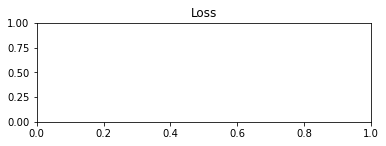

In [23]:
# evaluate the model
_, train_acc = model6.evaluate(X_train, y_train, verbose=0)
_, test_acc = model6.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(model6.history.history['loss'], label='train')
pyplot.plot(model6.history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(model6.history.history['accuracy'], label='train')
pyplot.plot(model6.history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()